In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import astropy
from astropy.io import fits
import sys

In [26]:
filename='matchstars_tight_v2.csv'
valsin=np.loadtxt(filename,dtype=float,delimiter=',',skiprows=1)
colvals=np.loadtxt('uds_headerslist.txt',dtype=str,usecols=0)
colval2=np.loadtxt('matchstars_headers',dtype=str,delimiter=' | ')
colnames=np.concatenate((colvals,colval2))
colnames=colnames[0:29]
colnames[28]='Separation'
colnames[9]='id'
colnames[10]='ra'
colnames[11]='dec'
colnames[16]='f_f160w'
print(colnames)
#make easy region files for ds9 check
#i=0
#for i in range(len(valsin[:,12])):
#    print('circle(',valsin[i,1],',',valsin[i,2],',','7.0"',')')

['NUMBER' 'ALPHA_J2000' 'DELTA_J2000' 'FLUX_APER' 'FLUXERR_APER'
 'FWHM_IMAGE' 'FLAGS' 'CLASS_STAR' 'FLUX_RADIUS' 'id' 'ra' 'dec'
 'faper_f160w' 'eaper_f160w' 'faper_f140w' 'eaper_f140w' 'f_f160w'
 'e_f160w ' 'w_f160w ' 'star_flag' 'a_image' 'b_image' 'class_star'
 'flux_radius' 'fwhm_image' 'flags' 'contam_flag' 'use_phot' 'Separation']


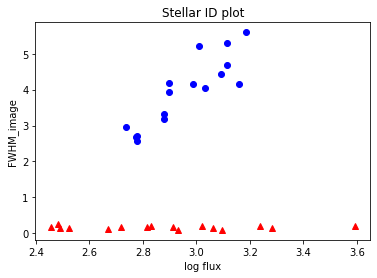

In [32]:
logflux=np.log10(valsin[:,3])
fwhmim=valsin[:,5]
plt.figure()
plt.title('Stellar ID plot')
plt.xlabel('log flux')
plt.ylabel('FWHM_image')

plt.plot(logflux,fwhmim,'bo')
plt.plot(np.log10(valsin[:,12]),valsin[:,23],'r^')
plt.show()

I don't really know what to think about this plot. The red values are the data from 3DHST, the blue the same data from our analysis/sextractor run of the dataset.

Now, onto the math. set phot parameters. ABMAG = -2.5xlogFv -48.6; Fv needs to be ergs/cm2/s/Hz; easy, using photnu instead of photlambda. for the 3dhst set, magAB = 25.0-2.5xlog10(flux), no conversion needed

In [28]:
photfnu=1.518757E-07
photflam=        1.9275602E-20
photplam=            15369.176
#assuming, since photflam is in coordinates of erg/cm2/A/electron, 
#that photfnu is erg/cm2/Hz/electron

In [29]:
abmag=-2.5*np.log10(photfnu*valsin[:,3])-48.6
print(abmag)
abmag_3dhst=-2.5*np.log10(valsin[:,12])+25.0
# magAB = 25.0-2.5*log10(flux)
print(abmag_3dhst)


[-39.34245495 -38.4901219  -38.49534877 -38.39926729 -38.75229499
 -39.02559367 -39.28317644 -38.80281216 -38.50358723 -39.51454344
 -39.45521316 -39.33798848 -38.80229918 -39.07864647 -39.131471
 -38.7494713 ]
[17.26284559 18.69072512 18.79227507 18.85998171 18.32505552 17.67406668
 17.44385889 17.92557224 18.76964266 16.90586803 17.34031353 16.79153504
 17.96241323 16.01683541 17.71461991 18.20674994]


****What on earth is going on here? is it a problem with zeropoints or flux conversion?****

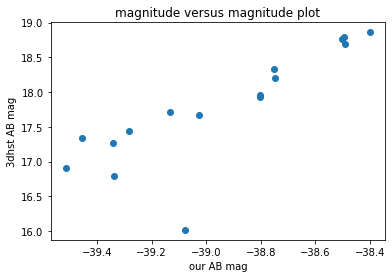

Text(0, 0.5, '3dhst-ours')

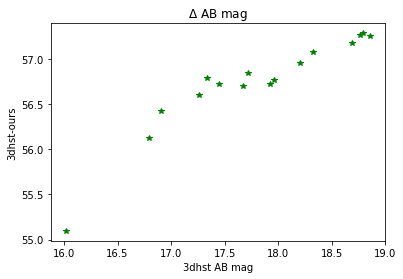

In [40]:
plt.plot(abmag,abmag_3dhst,'o')
plt.title('magnitude versus magnitude plot')
plt.xlabel('our AB mag')
plt.ylabel('3dhst AB mag')
plt.show()
plt.plot(abmag_3dhst,abmag_3dhst-abmag,'g*')
plt.title(r'$\Delta$ AB mag')
plt.xlabel('3dhst AB mag')
plt.ylabel('3dhst-ours')

That's.... not spectacular. Is it different using a different method? slightly improved using the correct pixelscale setting